# 淘宝商品信息

首先分析url结构，获得搜索接口、页面序号。

In [1]:
import requests
import re

In [13]:
def getHTMLText(url, headers_config):
    try:
        r = requests.get(url, timeout=30, headers = headers_config)
        r.raise_for_status()
        r.encoding=r.apparent_encoding
        return r.text
    except:
        return ""

In [50]:
def parsePage(ilt, html):
    plt = re.findall('\"view_price\"\:\"[\d\.]*\"',html)
    tlt = re.findall('\"raw_title\"\:\".*?\"',html)
    for i in range(len(plt)):
        price = eval(eval(plt[i].split(':')[1]))
        title = eval(tlt[i].split(':')[1])
        ilt.append([price,title])
    return ilt

In [36]:
def printGoodsList(ilt):
   tplt = "{:4}\t{:8}\t{:16}"
   print(tplt.format("序号","价格","商品名称"))
   count = 0
   for g in ilt:
    count = count+1
    print(tplt.format(count, g[0], g[1])) 

淘宝现在未登录无法搜索，所以先在浏览器登录一下，用chrome打开requests的headers，复制其中的cookie信息作为爬虫配置就可以了。（附带cookie信息的request相当于弱登录，搜索商品足够了）

In [11]:
headers_config = {'User-Agent': 'Mozilla/5.0',
                'cookie':'我实际运行时填的cookie删掉了，因为我要保护我的隐私。'
                }

In [ ]:
goods = '书包'
start_url = 'https://s.taobao.com/search?q=' + goods
r = requests.get(start_url, timeout=30, headers=headers_config)
r.text


<!DOCTYPE html>
<html lang="zh-CN">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="renderer" content="webkit">
    <meta name="data-spm" content="a230r">
    <link rel="dns-prefetch" href="//g.alicdn.com">
    <link rel="dns-prefetch" href="//assets.alicdn.com">
    <link rel="dns-prefetch" href="//img.alicdn.com">
    <link rel="dns-prefetch" href="//g-search1.alicdn.com">
    <link rel="dns-prefetch" href="//g-search2.alicdn.com">
    <link rel="dns-prefetch" href="//g-search3.alicdn.com">
    <link rel="dns-prefetch" href="//g-search4.alicdn.com">
    <link rel="dns-prefetch" href="//gtms01.alicdn.com">
    <link rel="dns-prefetch" href="//gtms02.alicdn.com">
    <link rel="dns-prefetch" href="//gtms03.alicdn.com">
    <link rel="dns-prefetch" href="//gtms04.alicdn.com">
    <link rel="shortcut icon" href="//www.taobao.com/favicon.ico">
    <meta name="aplus-auto-exp" content='[{"logkey":"/tbpcsearch.item.search_item_exp"
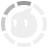

In [23]:
print(r.text)

In [19]:
info_list = []

In [27]:
plt = re.findall('\"view_price\"\:\"[\d\.]*\"',r.text)
tlt = re.findall('\"raw_title\"\:\".*?\"',r.text)

In [28]:
plt

['"view_price":"55.50"',
 '"view_price":"59.00"',
 '"view_price":"48.50"',
 '"view_price":"220.00"',
 '"view_price":"168.00"',
 '"view_price":"288.00"',
 '"view_price":"179.00"',
 '"view_price":"279.00"',
 '"view_price":"128.00"',
 '"view_price":"499.00"',
 '"view_price":"108.00"',
 '"view_price":"228.00"',
 '"view_price":"435.00"',
 '"view_price":"169.00"',
 '"view_price":"88.00"',
 '"view_price":"379.00"',
 '"view_price":"259.00"',
 '"view_price":"148.00"',
 '"view_price":"419.00"',
 '"view_price":"68.00"',
 '"view_price":"94.00"',
 '"view_price":"99.00"',
 '"view_price":"98.00"',
 '"view_price":"168.00"',
 '"view_price":"218.00"',
 '"view_price":"99.00"',
 '"view_price":"190.00"',
 '"view_price":"69.00"',
 '"view_price":"128.00"',
 '"view_price":"155.00"',
 '"view_price":"79.00"',
 '"view_price":"608.00"',
 '"view_price":"65.00"',
 '"view_price":"99.00"',
 '"view_price":"188.00"',
 '"view_price":"119.00"',
 '"view_price":"259.00"',
 '"view_price":"99.00"',
 '"view_price":"225.00"',


In [31]:
eval(eval(plt[i].split(':')[1]))

55.5

In [37]:
parsePage(info_list, r.text)

In [38]:
info_list

[['55.50', '蓝色书包女韩版高中大学生多层双肩包14寸'],
 ['59.00', '书包女小学生三到六年级女生夏中学生初中生女孩大容量可爱双肩包'],
 ['48.50', '韩版ins大容量双肩包男女初高中学生撞色书包百搭潮大学生电脑包'],
 ['220.00', '日本小学生书包男女生日式儿童双肩背包1-3-6年级减负护脊防溺水'],
 ['168.00', '杰克阿玛尼背包男双肩包真皮大容量休闲商务电脑包潮流旅行包书包'],
 ['288.00', '日本小学生护脊书包1-3-6年级儿童补习双肩背包男女童减负防溺水'],
 ['179.00', '巴斯光年限定背包大容量双肩包男女运动篮球训练包高中学生书包潮'],
 ['279.00', '法国SANDRO IFASHION 双肩包中学生克莱因蓝书包高中原宿背包多层'],
 ['128.00', 'nasa联名款网红太空人背包男生双肩包大学生高中生初中学生书包大'],
 ['499.00', 'Light+Nine美国进口横版小学生书包一二三年级男孩女童儿童双肩包'],
 ['108.00', '刺客伍六七学生书包男柒小初高中双肩包567大容量ins潮酷动漫背包'],
 ['228.00', '瑞士军刀双肩包大容量休闲商务旅行电脑背包男户外初高中学生书包'],
 ['435.00', '【GPS定位】日本书包减负小学生儿童背包贵族学校减压护脊ins推荐'],
 ['169.00', '17.3寸笔记本外星人P1游戏本电脑男士双肩背包键盘大容量商务书包'],
 ['88.00', '正品CONVERSE匡威包书包男女双肩包韩版校园休闲运动高中学生背包'],
 ['379.00', '日本kyosho小学生书包护脊儿童双肩包男孩女童减负防溺1-3-6年级'],
 ['259.00', '剑桥树书包儿童小学生男孩女一到三六年级悬浮减重护脊减负防驼背'],
 ['148.00', '正品耐克nike书包男女初中高中学生大容量双肩包旅行背包2022新款'],
 ['419.00', '正品Sprayground双肩背包书包电脑学生潮牌透明男女街头潮牌鲨鱼'],
 ['68.00', 'Converse匡威双肩包男校园大学生书包女潮流休闲百搭帆布电脑背包'],
 ['94.00', '新款书包女生小学生一二三

In [39]:
printGoodsList(info_list)

序号  	价格      	商品名称            
   1	55.50   	蓝色书包女韩版高中大学生多层双肩包14寸
   2	59.00   	书包女小学生三到六年级女生夏中学生初中生女孩大容量可爱双肩包
   3	48.50   	韩版ins大容量双肩包男女初高中学生撞色书包百搭潮大学生电脑包
   4	220.00  	日本小学生书包男女生日式儿童双肩背包1-3-6年级减负护脊防溺水
   5	168.00  	杰克阿玛尼背包男双肩包真皮大容量休闲商务电脑包潮流旅行包书包
   6	288.00  	日本小学生护脊书包1-3-6年级儿童补习双肩背包男女童减负防溺水
   7	179.00  	巴斯光年限定背包大容量双肩包男女运动篮球训练包高中学生书包潮
   8	279.00  	法国SANDRO IFASHION 双肩包中学生克莱因蓝书包高中原宿背包多层
   9	128.00  	nasa联名款网红太空人背包男生双肩包大学生高中生初中学生书包大
  10	499.00  	Light+Nine美国进口横版小学生书包一二三年级男孩女童儿童双肩包
  11	108.00  	刺客伍六七学生书包男柒小初高中双肩包567大容量ins潮酷动漫背包
  12	228.00  	瑞士军刀双肩包大容量休闲商务旅行电脑背包男户外初高中学生书包
  13	435.00  	【GPS定位】日本书包减负小学生儿童背包贵族学校减压护脊ins推荐
  14	169.00  	17.3寸笔记本外星人P1游戏本电脑男士双肩背包键盘大容量商务书包
  15	88.00   	正品CONVERSE匡威包书包男女双肩包韩版校园休闲运动高中学生背包
  16	379.00  	日本kyosho小学生书包护脊儿童双肩包男孩女童减负防溺1-3-6年级
  17	259.00  	剑桥树书包儿童小学生男孩女一到三六年级悬浮减重护脊减负防驼背
  18	148.00  	正品耐克nike书包男女初中高中学生大容量双肩包旅行背包2022新款
  19	419.00  	正品Sprayground双肩背包书包电脑学生潮牌透明男女街头潮牌鲨鱼
  20	68.00   	Converse匡威双肩包男校园大学生书包女潮流休闲百搭帆布电脑背包
  21	94.00   	新款书包女生小学生一二三到六

In [54]:
goods = '书包'
depth = 2
start_url = 'https://s.taobao.com/search?q=' + goods
for i in range(depth):
    url = start_url + '&s=' + str(44*i) 
    html = getHTMLText(url, headers_config)
    info_list = parsePage([], html)
printGoodsList(info_list) 

序号  	价格      	商品名称            
   1	   209.6	LIVEBOX书包女大学生日系ins初中高中生大容量双肩包简约电脑背包
   2	   149.0	爱迪生儿童书包小学生男生一二三到六年级6-12岁减负护脊双肩包男
   3	   258.0	牛津大学儿童书包男孩小学生三到六年级轻护脊减负一二儿童节礼物
   4	    99.9	KK树幼儿园书包儿童女孩男童宝宝轻便防走失双肩背包可爱女童小班
   5	   315.0	unme书包小学生男女孩护脊减负一二三到六年级儿童轻便耐磨双肩包
   6	   119.0	麒星书包女生小学生一二三到六年级减负护脊超轻便儿童双肩包新款
   7	   249.0	国家地理背包女运动户外时尚电脑双肩包男旅行防水学生情侣书包大
   8	    79.0	凯蒂猫女童书包女生小学生一二到三到六年级轻便女孩减负护脊儿童
   9	    55.9	幼儿园书包男女童女孩儿童双肩包包宝宝小黄鸭防走失背包超萌2岁
  10	   179.0	KK剑桥树书包小学生女孩一二三到六年级儿童双肩包护脊减负6-12岁
  11	   198.0	书包小学生新款减负护脊超轻便悬浮男女生一二三到六年级儿童书包
  12	   469.0	MoonRock梦乐护脊减负书包1-3-6年级小学生男女童大容量轻便背包
  13	   498.0	Tiger Family护脊减负 书包小学生1-3-5年级儿童女孩新款男童背包
  14	    13.9	幼儿园书包定制印LOGO订制女小学生男童潮宝宝定做儿童培训班印字
  15	   299.9	迪卡侬官方双肩包女电脑包休闲挎包手提包书包骑行运动背包男MSTE
  16	   738.0	GMT for Kids儿童书包女生小学生背包男孩轻护脊减负一三到六年级
  17	   900.0	Gaston Luga吴宇恒同款电脑双肩包男皮大容量书包男潮旅行背包女
  18	    79.9	双肩包男士大容量商务旅行包电脑背包时尚潮流初中高中大学生书包
  19	   618.0	backcare小学生书包奥特曼一二三到六年级儿童男女孩护脊减负轻便
  20	   118.0	瑞士双肩包男大容量商务旅行电脑背包男士高中初中学生书包大学生
  21	    69.0	书包男初中生20

最后一点建议：不要学老师写try except，因为他的代码年久失修已经跟不上现状了，所以需要调试，加上try except不报错，反而是障碍。